In [168]:
# before you start, you are supposed to install some libraries: yfinance, sklearn, seaborn and pandas
# using the following code:
# pip install yfinance, scikit-learn, seaborn, pandas, statsmodels, xlrd
# or
# py -m pip install yfinance, scikit-learn, seaborn, pandas, statsmodels, xlrd

In [169]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import glob
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



In [170]:
STARTTIME = '2015-01-01'
ENDTIME = dt.datetime.now().strftime('%Y-%m-%d')

# add the tickers name here (data available from yahoo finance)
# ticker: long
YAHOO_TICKER = {
    'CL=F': 'WTI_Price',
    'DX-Y.NYB': 'USD_Index',
    'GC=F': 'Gold',
    '^GSPC': 'S&P500',
    '^OVX': 'Crude Oil Volatility Index',
    'BZ=F': 'Brent Crude Oil',
    'NG=F': 'Natural Gas'
}

In [171]:
#show the fundamental data

def show_dataframe_info(df):
    display(df.head(5))
    display(df.tail(5))
    display(df.info())
    display(df.describe())


In [172]:
# tmp = yf.Ticker('CL=F').history(period = '20y')['Close']
# tmp = pd.DataFrame()
# for key,value in YAHOO_TICKER.items():
#     tmp[value] = yf.Ticker(key).history(start= STARTTIME, end = ENDTIME)['Close']
# show_dataframe_info(tmp['Gold'])

In [195]:
# gpr_file_path = glob.glob('*gpr*')
# display(gpr_file_path)
# read and preprocess the data of geopolitical risk index
gpr_df = pd.read_excel('data_gpr_export.xls')
gpr_df = gpr_df[gpr_df['month'] > pd.to_datetime('2014-12-31')]
show_dataframe_info(gpr_df)

,month,GPR,GPRT,GPRA,GPRH,GPRHT,GPRHA,SHARE_GPR,N10,SHARE_GPRH,...,GPRHC_TUN,GPRHC_TUR,GPRHC_TWN,GPRHC_UKR,GPRHC_USA,GPRHC_VEN,GPRHC_VNM,GPRHC_ZAF,var_name,var_label
1380,2015-01-01,111.985695,83.503906,153.339844,94.441063,91.560730,110.733574,3.358881,23877.0,3.406891,...,0.077429,0.309717,0.025810,0.374242,3.187508,0.090334,0.038715,0.038715,NaN,NaN
1381,2015-02-01,111.924698,118.225204,107.790535,98.143181,125.612961,82.122032,3.357052,21924.0,3.540442,...,0.013994,0.321858,0.013994,0.979569,3.372516,0.041982,0.027988,0.055975,NaN,NaN
1382,2015-03-01,104.235268,117.488731,83.632851,95.053612,135.944366,61.763210,3.126416,24277.0,3.428988,...,0.060798,0.255350,0.012160,0.303988,3.343872,0.097276,0.072957,0.048638,NaN,NaN
1383,2015-04-01,102.190491,110.188728,95.086456,90.097191,117.820038,77.034691,3.065085,23523.0,3.250189,...,0.025195,0.264550,0.012598,0.214160,3.174603,0.088183,0.088183,0.025195,NaN,NaN
1384,2015-05-01,76.262329,77.668732,72.861885,67.888588,74.838821,61.919163,2.287400,23389.0,2.449030,...,0.024863,0.136748,0.024863,0.186474,2.299851,0.024863,0.087021,0.024863,NaN,NaN


,month,GPR,GPRT,GPRA,GPRH,GPRHT,GPRHA,SHARE_GPR,N10,SHARE_GPRH,...,GPRHC_TUN,GPRHC_TUR,GPRHC_TWN,GPRHC_UKR,GPRHC_USA,GPRHC_VEN,GPRHC_VNM,GPRHC_ZAF,var_name,var_label
1508,2025-09-01,124.079651,139.908249,114.635307,113.948402,161.894531,91.920853,3.721625,14053.0,4.110604,...,0.024688,0.259227,0.086409,0.765338,2.740402,0.296260,0.111097,0.074065,NaN,NaN
1509,2025-10-01,154.425201,168.787811,149.251846,132.661896,166.251572,122.505890,4.631805,14897.0,4.785679,...,0.012177,0.292255,0.170482,0.754993,3.214808,0.621042,0.024355,0.085241,NaN,NaN
1510,2025-11-01,105.074623,118.692383,90.213280,90.545578,119.135490,77.982948,3.151592,15865.0,3.266364,...,0.000000,0.194426,0.129618,0.518471,2.164614,0.505509,0.077771,0.090732,NaN,NaN
1511,2025-12-01,132.214859,146.055527,123.194466,112.340988,142.124802,99.599037,3.965631,15130.0,4.052618,...,0.000000,0.159447,0.225884,0.876960,2.870050,0.571353,0.039862,0.039862,NaN,NaN
1512,2026-01-01,163.740601,211.301193,102.975090,127.886726,197.141708,71.844948,4.911210,14416.0,4.613419,...,0.025559,0.306709,0.153355,0.856230,3.386581,1.431310,0.012780,0.012780,NaN,NaN


<class 'pandas.DataFrame'>
RangeIndex: 133 entries, 1380 to 1512
Columns: 115 entries, month to var_label
dtypes: datetime64[us](1), float64(111), int64(1), str(2)
memory usage: 119.6 KB


None

,month,GPR,GPRT,GPRA,GPRH,GPRHT,GPRHA,SHARE_GPR,N10,SHARE_GPRH,...,GPRHC_SWE,GPRHC_THA,GPRHC_TUN,GPRHC_TUR,GPRHC_TWN,GPRHC_UKR,GPRHC_USA,GPRHC_VEN,GPRHC_VNM,GPRHC_ZAF
count,133,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,2020-07-01 07:34:44.210526,111.266137,125.836006,97.255380,87.287146,114.051906,73.585810,3.337299,19880.037594,3.148819,...,0.086181,0.033654,0.025037,0.374127,0.122436,0.788081,2.976079,0.111807,0.087391,0.048507
min,2015-01-01 00:00:00,58.420769,64.036316,28.454628,46.875725,55.361584,21.128803,1.752263,13974.000000,1.691007,...,0.000000,0.000000,0.000000,0.059075,0.000000,0.015058,1.675634,0.000000,0.000000,0.000000
25%,2017-10-01 00:00:00,87.424103,95.489594,63.251530,69.343277,88.436012,45.370331,2.622185,16529.000000,2.501507,...,0.030746,0.014251,0.000000,0.223847,0.028563,0.162470,2.365464,0.037764,0.041265,0.015328
50%,2020-07-01 00:00:00,105.201233,118.692383,93.122986,86.417244,107.733932,71.752914,3.155389,20692.000000,3.117438,...,0.074616,0.028645,0.015293,0.317125,0.081169,0.315638,2.902338,0.074239,0.076234,0.038715
75%,2023-04-01 00:00:00,130.521866,140.836090,117.582016,100.308052,129.594208,92.139427,3.914852,22459.000000,3.618538,...,0.118747,0.047813,0.030628,0.478348,0.185598,1.207591,3.386581,0.115674,0.117805,0.063508
max,2026-01-01 00:00:00,318.954926,403.713623,250.955856,167.344406,264.452179,167.498856,9.566683,24954.000000,6.036825,...,0.519673,0.249185,0.250941,1.193565,0.797575,5.553879,6.006640,1.431310,0.376432,0.197954
std,NaN,35.760039,46.013302,43.901074,23.997971,34.514479,32.032990,1.072581,3118.273491,0.865709,...,0.083705,0.033689,0.035547,0.206324,0.126394,0.957026,0.763362,0.160385,0.063812,0.043404


In [173]:
# there are lot of values, including open price, daily highest/loweste price, volumes, etc.
# we extract Close price
yh_data = yf.download(list(YAHOO_TICKER.keys()),STARTTIME,ENDTIME)['Close']
yh_data = yh_data.rename(columns = YAHOO_TICKER)
show_dataframe_info(yh_data)

[*********************100%***********************]  7 of 7 completed


Ticker,Brent Crude Oil,WTI_Price,USD_Index,Gold,Natural Gas,S&P500,Crude Oil Volatility Index
Date,,,,,,,
2015-01-02,56.419998,52.689999,91.080002,1186.000000,3.003,2058.199951,54.250000
2015-01-05,53.110001,50.040001,91.379997,1203.900024,2.882,2020.579956,57.669998
2015-01-06,51.099998,47.930000,91.500000,1219.300049,2.938,2002.609985,56.450001
2015-01-07,51.150002,48.650002,91.889999,1210.599976,2.871,2025.900024,53.250000
2015-01-08,50.959999,48.790001,92.370003,1208.400024,2.927,2062.139893,50.959999


Ticker,Brent Crude Oil,WTI_Price,USD_Index,Gold,Natural Gas,S&P500,Crude Oil Volatility Index
Date,,,,,,,
2026-01-30,70.690002,65.209999,96.989998,4713.899902,4.354,6939.029785,55.910000
2026-02-02,66.300003,62.139999,97.610001,4622.500000,3.237,6976.439941,48.700001
2026-02-03,67.330002,63.209999,97.440002,4903.700195,3.311,6917.810059,52.340000
2026-02-04,69.459999,65.139999,97.620003,4920.399902,3.465,6882.720215,55.130001
2026-02-05,67.550003,63.290001,97.820000,4861.399902,3.509,6798.399902,54.970001


<class 'pandas.DataFrame'>
DatetimeIndex: 2795 entries, 2015-01-02 to 2026-02-05
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brent Crude Oil             2791 non-null   float64
 1   WTI_Price                   2790 non-null   float64
 2   USD_Index                   2791 non-null   float64
 3   Gold                        2789 non-null   float64
 4   Natural Gas                 2791 non-null   float64
 5   S&P500                      2790 non-null   float64
 6   Crude Oil Volatility Index  2790 non-null   float64
dtypes: float64(7)
memory usage: 174.7 KB


None

Ticker,Brent Crude Oil,WTI_Price,USD_Index,Gold,Natural Gas,S&P500,Crude Oil Volatility Index
count,2791.000000,2790.000000,2791.000000,2789.000000,2791.000000,2790.000000,2790.000000
mean,66.565758,62.238344,98.315059,1797.086445,3.178146,3643.148623,40.146340
std,17.586796,17.289582,4.847715,718.115230,1.352829,1356.168574,18.130011
min,19.330000,-37.630001,88.589996,1050.800049,1.482000,1829.079956,17.860001
25%,53.709999,49.572500,94.795002,1273.199951,2.485000,2496.704956,30.879999
50%,66.139999,61.210001,97.599998,1711.900024,2.824000,3302.484985,36.610001
75%,77.640003,72.987499,101.785000,1944.300049,3.322000,4466.949951,44.490002
max,127.980003,123.699997,114.110001,5318.399902,9.680000,6978.600098,325.149994


In [174]:
def plot_distribution_hist(df, ax, title = None, bins = 100):
    df.plot.hist(ax = ax, bins = bins, alpha = 0.7, legend = False)
    ax.set_title(title)
    ax.set_ylabel('frequency')
    ax.set_xlabel("Value")
    ax.legend()



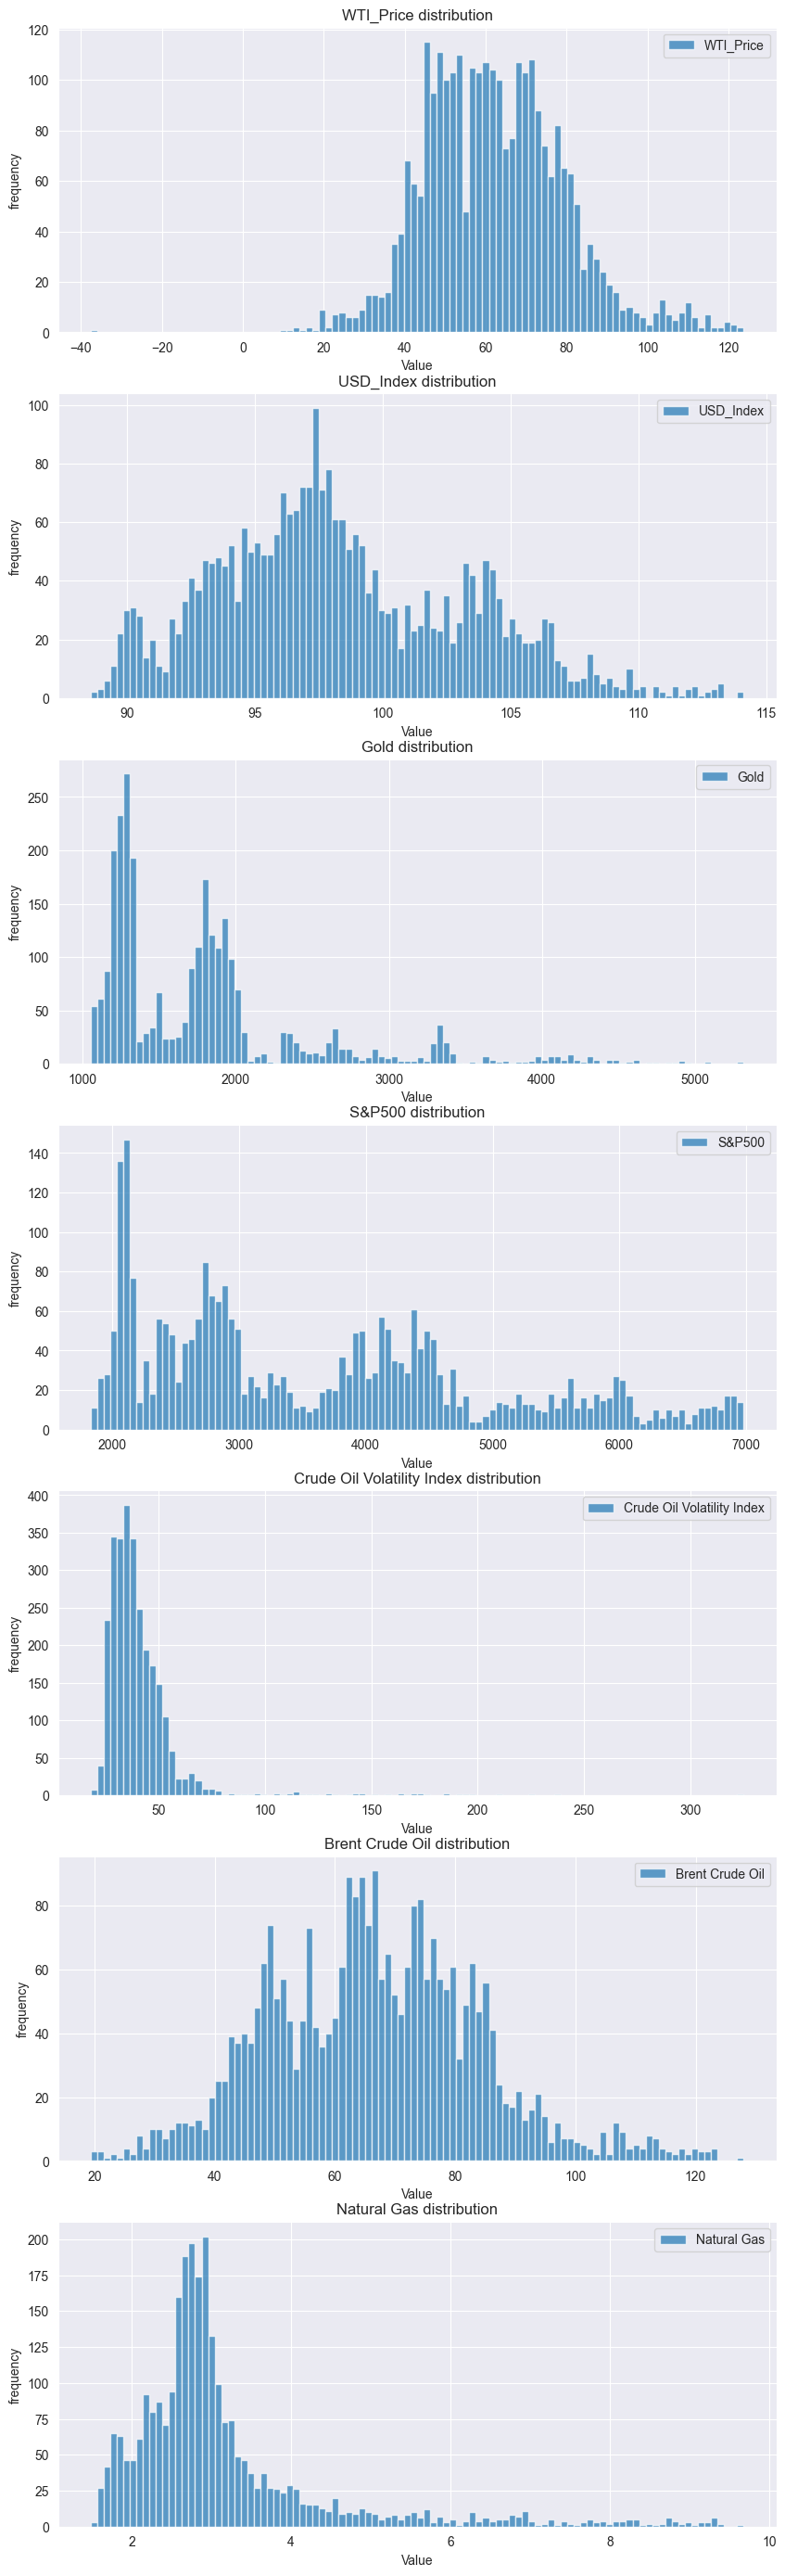

In [175]:
fig, axs = plt.subplots(len(YAHOO_TICKER), 1, figsize = (10,len(YAHOO_TICKER)*5))
for val, ax in zip(YAHOO_TICKER.values(), axs):
    plot_distribution_hist(yh_data[val], ax, f'{val} distribution')

In [176]:
# plot the historical line chart of indicators
#     If the data are on different scales, you can put them into two separate data groups (df and df_right).
#     They will then be plotted using different y‑axes.



def plot_time_series(df, ax, title = None, df_right = None, alpha = 0.7):
    df.plot(ax = ax, alpha = alpha, legend = False)
    ax.set_title(title)
    ax.set_ylabel('')
    ax.set_xlabel("Time")
    if df_right is not None:
        ax2 = ax.twinx()
        df_right.plot(ax = ax2, alpha = alpha, colormap = 'flare', legend = False)
        handle1, line1 = ax.get_legend_handles_labels()
        handle2, line2 = ax2.get_legend_handles_labels()
        ax.legend(handle1 + handle2, line1 + line2, loc = 'upper left')
    else:
        ax.legend()


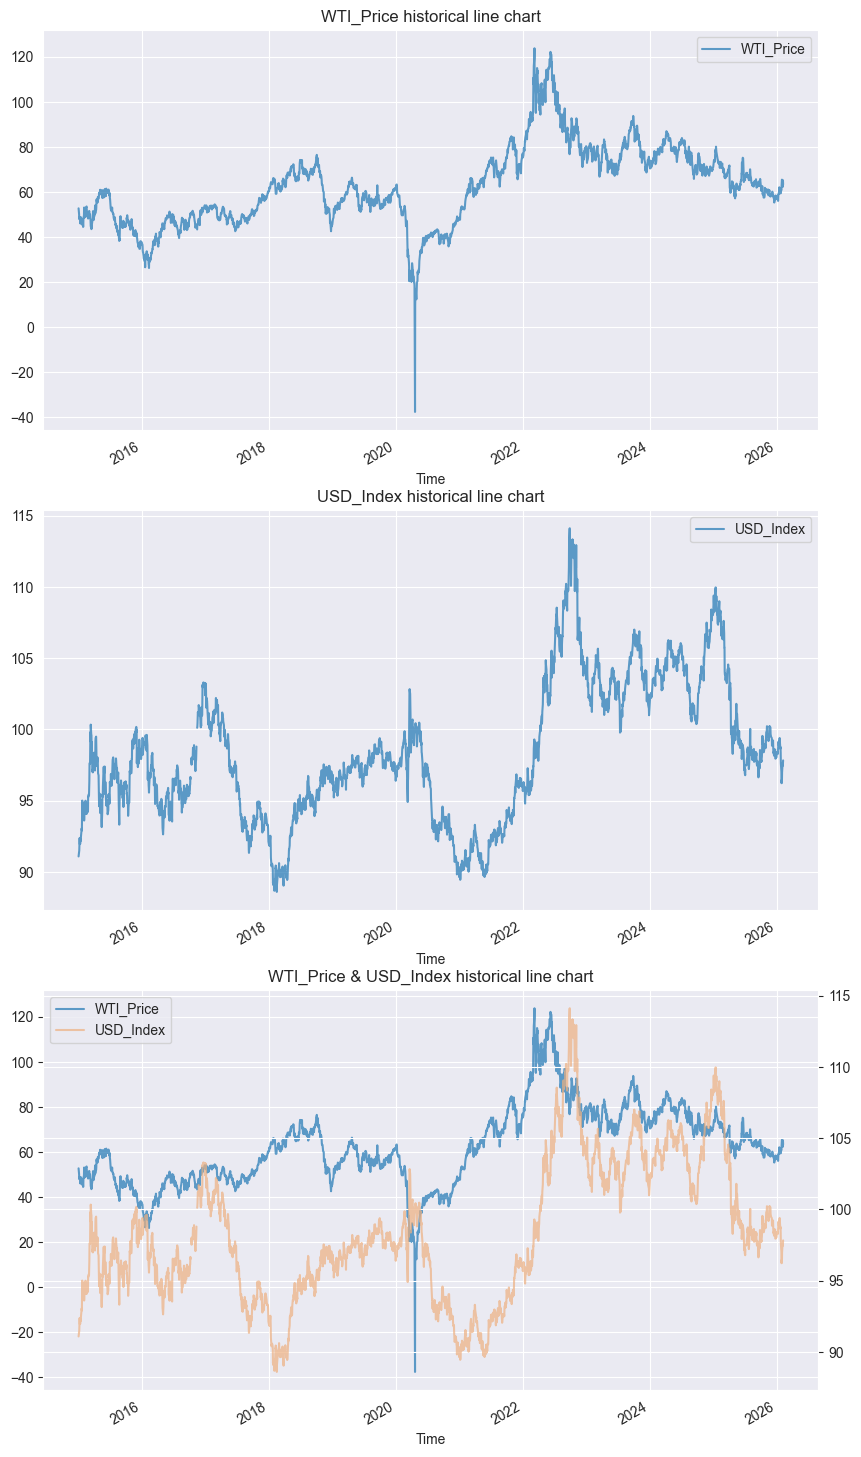

In [177]:
fig, ax = plt.subplots(3, 1, figsize = (10,20))
plot_time_series(yh_data['WTI_Price'], ax[0], 'WTI_Price historical line chart')
plot_time_series(yh_data['USD_Index'], ax[1], 'USD_Index historical line chart')
plot_time_series(yh_data['WTI_Price'], ax[2], 'WTI_Price & USD_Index historical line chart',
                 df_right = yh_data['USD_Index'])

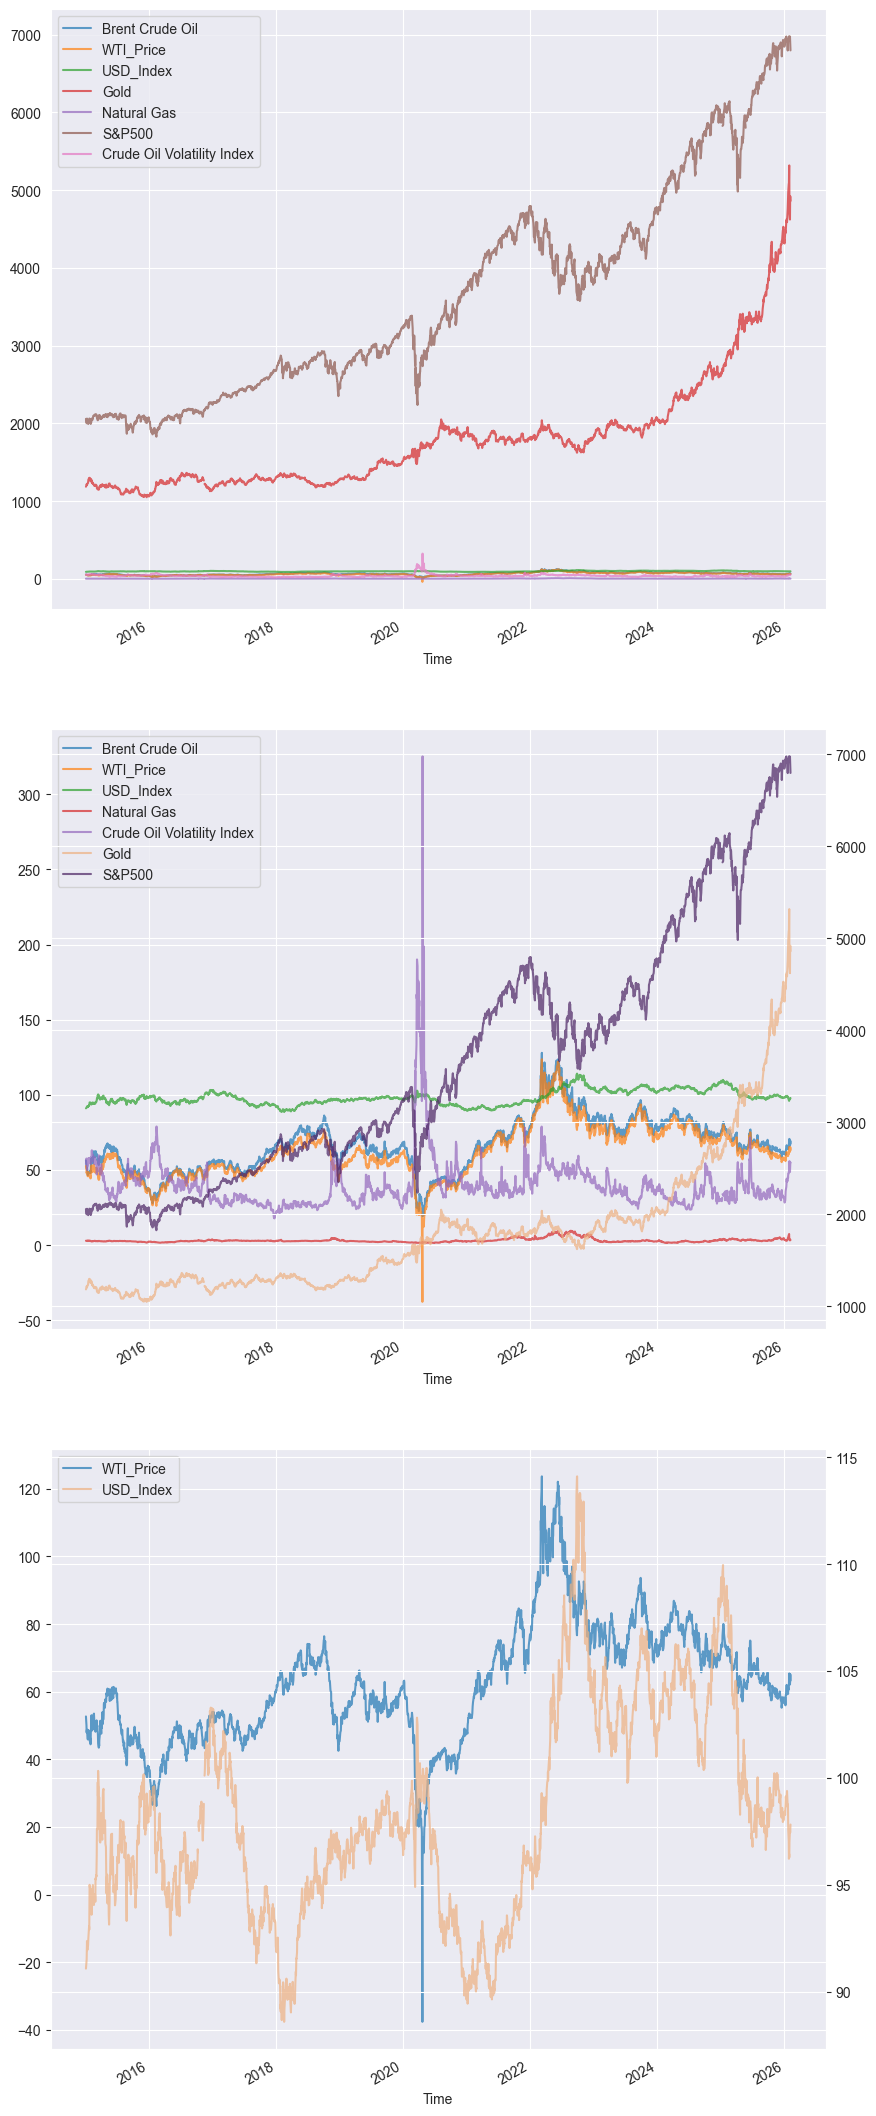

In [178]:
fig, ax = plt.subplots(3, 1, figsize = (10,30))
# plot all the datas with one axis
plot_time_series(yh_data,ax[0])

# according to the mean value, separate datas into two groups, leading to a more explicit graph
df_1 = yh_data[yh_data.columns[yh_data.mean()<1000]]
df_2 = yh_data.drop(columns = df_1.columns)
# display(df_1.head(), df_2.head())
plot_time_series(df_1, ax[1], df_right = df_2)

plot_time_series(yh_data['WTI_Price'], ax[2], df_right = yh_data['USD_Index'])

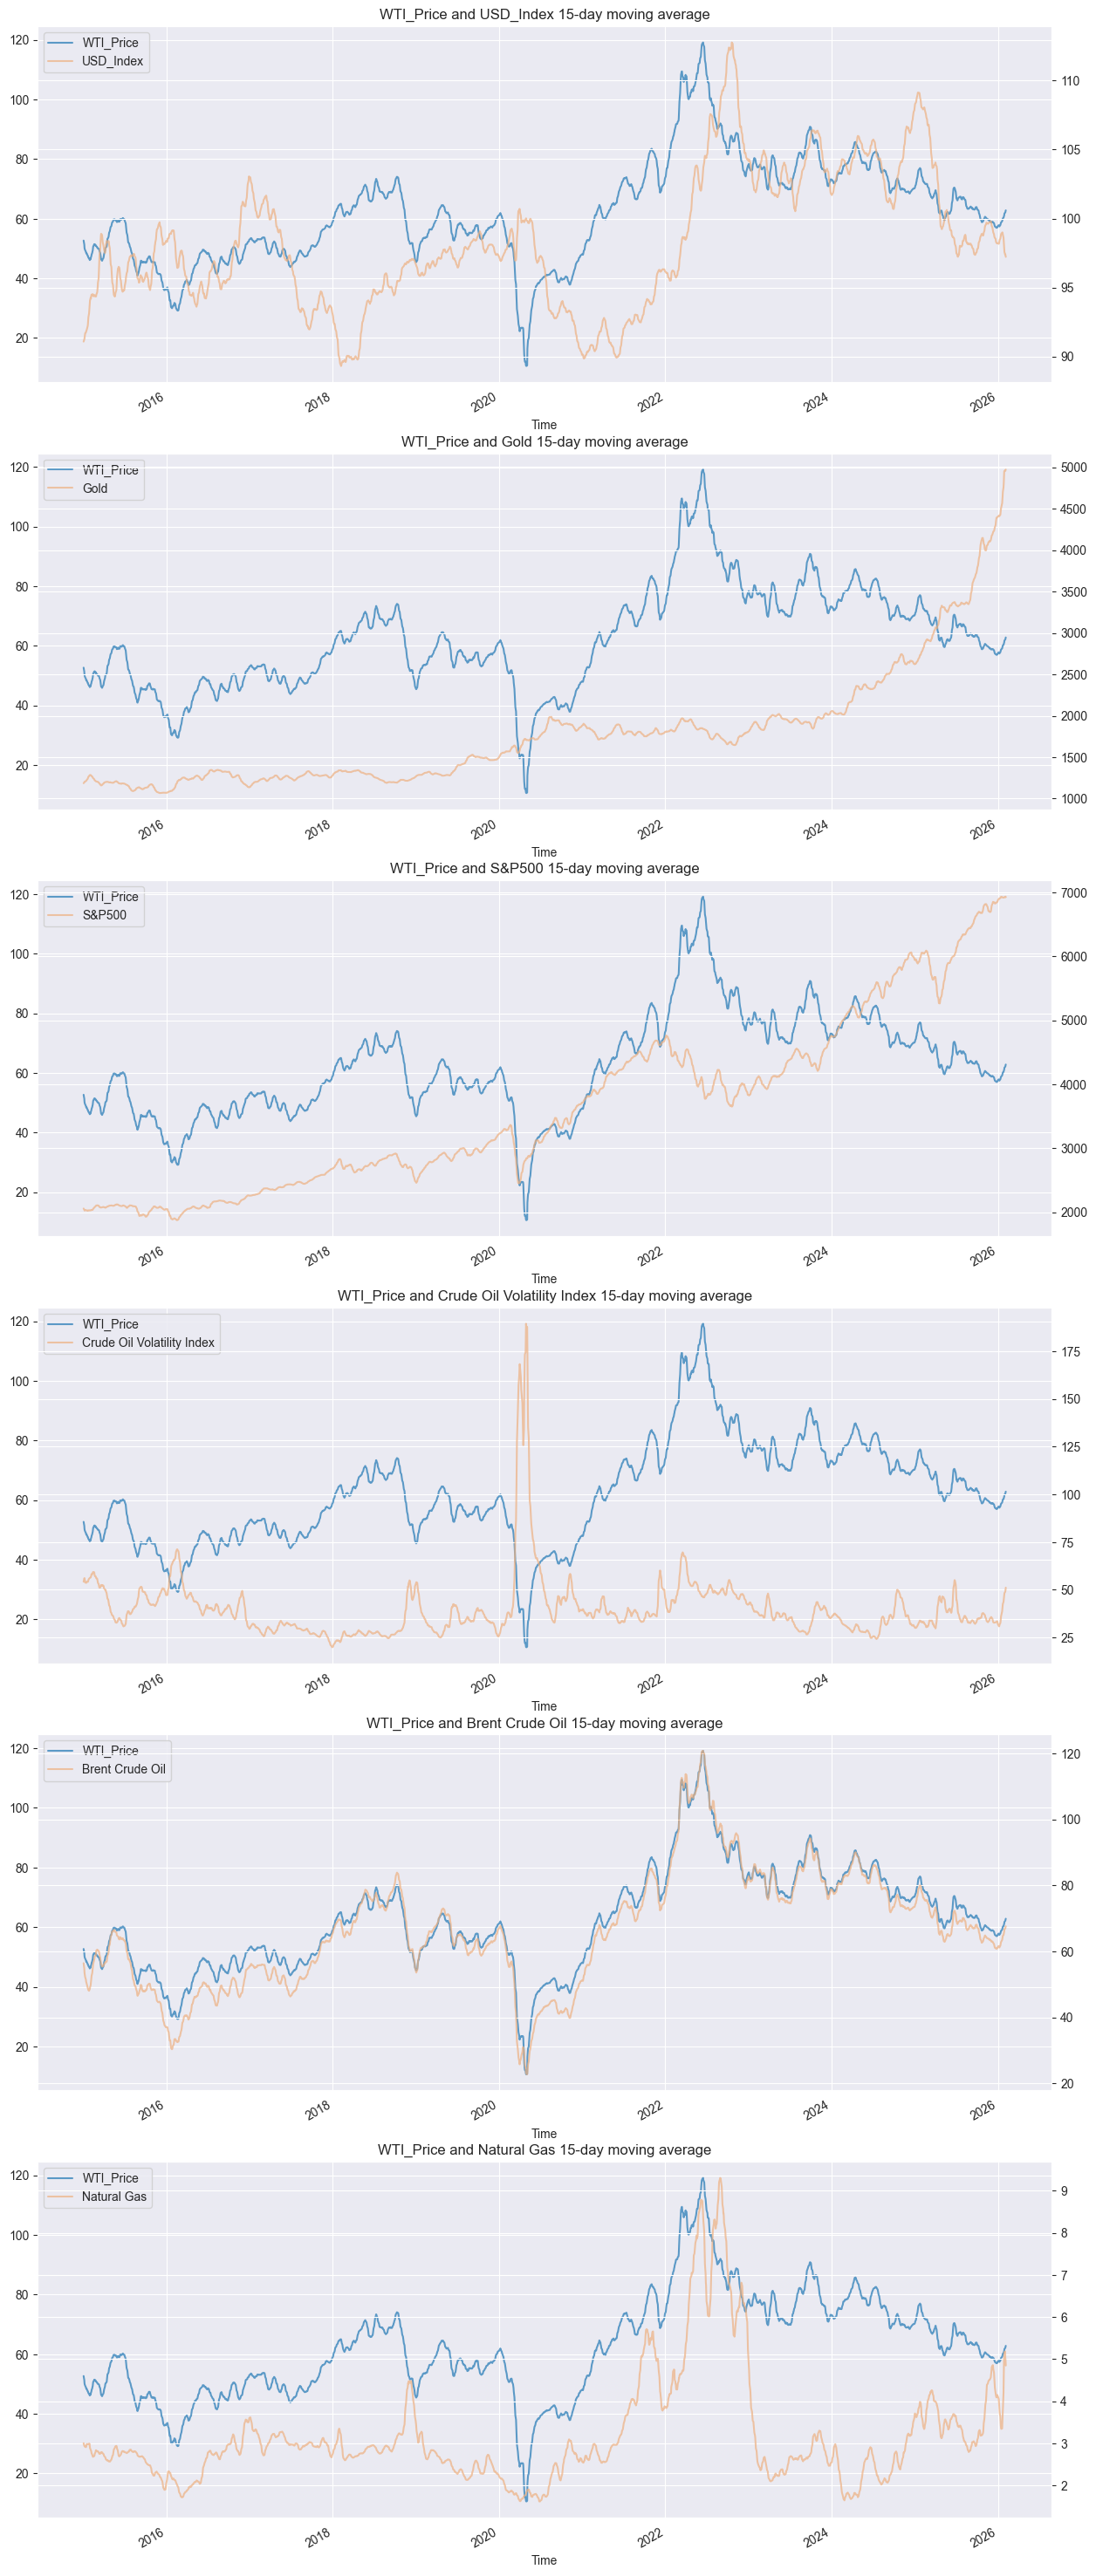

In [179]:
# To plot the historical line chart, but using the 15-day moving average. It helps reduce the impact of noise

fig,axs = plt.subplots(len(YAHOO_TICKER)-1, 1, figsize = (15, (len(YAHOO_TICKER)-1)*7), squeeze = False)
axs = axs.flatten()
ax_idx = 0
df_1 = yh_data['WTI_Price'].rolling('15D').mean()
for val in YAHOO_TICKER.values():
    if val == 'WTI_Price': continue
    df_2 = yh_data[val].rolling('15D').mean()
    plot_time_series(df_1, axs[ax_idx], f'WTI_Price and {val} 15-day moving average', df_right = df_2)
    ax_idx+=1

In [180]:
# WTI_Price are strongly correlative to Natural gas, USD index, Oil volatility index(sometimes seems to be negatively correlative, while others positively)

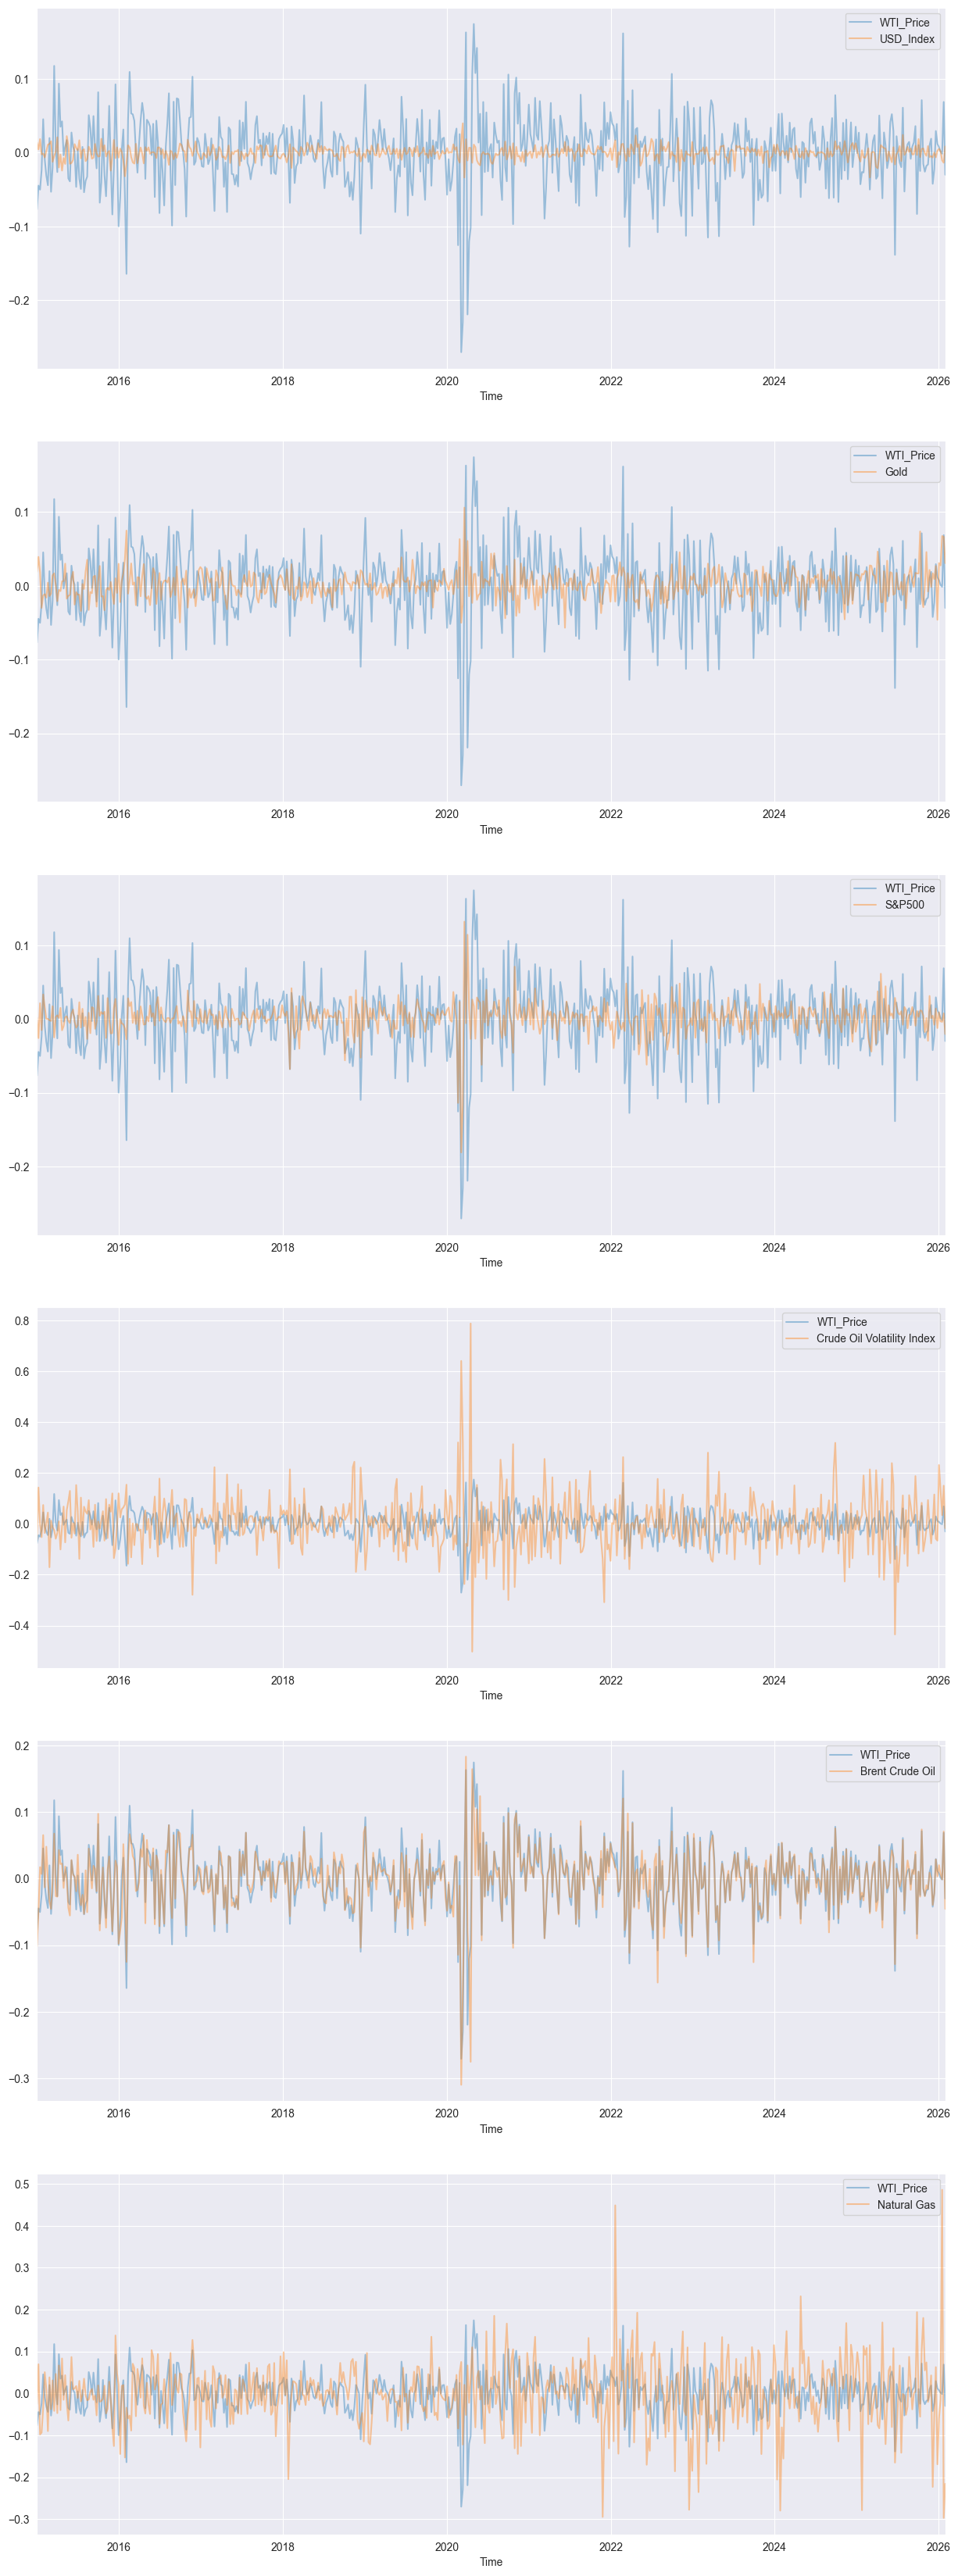

In [181]:
# we plot the weekly return to explore the relationship between WTI_Price and other parameters.

yh_data_resample = yh_data.resample(resample_interval)
yh_data_weekly_change = yh_data_resample.last()/yh_data_resample.first()-1
# or we can use the form similar to financial return
yh_data_weekly_change = np.log(yh_data_resample.last()/yh_data_resample.first())
# maybe there are features like volatility clustering, and larger percent change in some features can be leading factor of WTI price
# yh_data_weekly_change = abs(yh_data_weekly_change)


fig,axs = plt.subplots(len(YAHOO_TICKER)-1, 1, figsize = (15, (len(YAHOO_TICKER)-1)*7), squeeze = False)
axs = axs.flatten()
ax_idx = 0
resample_interval = '7D'
for val in YAHOO_TICKER.values():
    if val == 'WTI_Price': continue
    # df_merge = pd.merge(df_1, df_2, on = 'Date')
    # lower_bound = df_merge.quantile(0.01)
    # upper_bound = df_merge.quantile(0.99)
    # df_merge.clip(lower_bound, upper_bound, axis = 1, inplace=True)
    plot_time_series(yh_data_weekly_change[['WTI_Price', val]], axs[ax_idx], alpha = 0.4)
    ax_idx+=1

In [182]:
def plot_scatter(df,ax):
    df.dropna(inplace = True)
    x = df['WTI_Price'].values.reshape(-1,1)
    y = df[df.columns[1]].values.reshape(-1,1)
    model = LinearRegression()
    model.fit(x,y)
    x_range = np.linspace(x.min(), x.max(), 10000).reshape(-1,1)
    fit_line = model.predict(x_range)

    ax.scatter(x, y, s = 1)
    ax.set_xlabel('WTI_Price')
    ax.set_ylabel(df.columns[1])
    ax.plot(x_range, fit_line, color = 'red', label = 'LinearRegression')
    ax.legend()



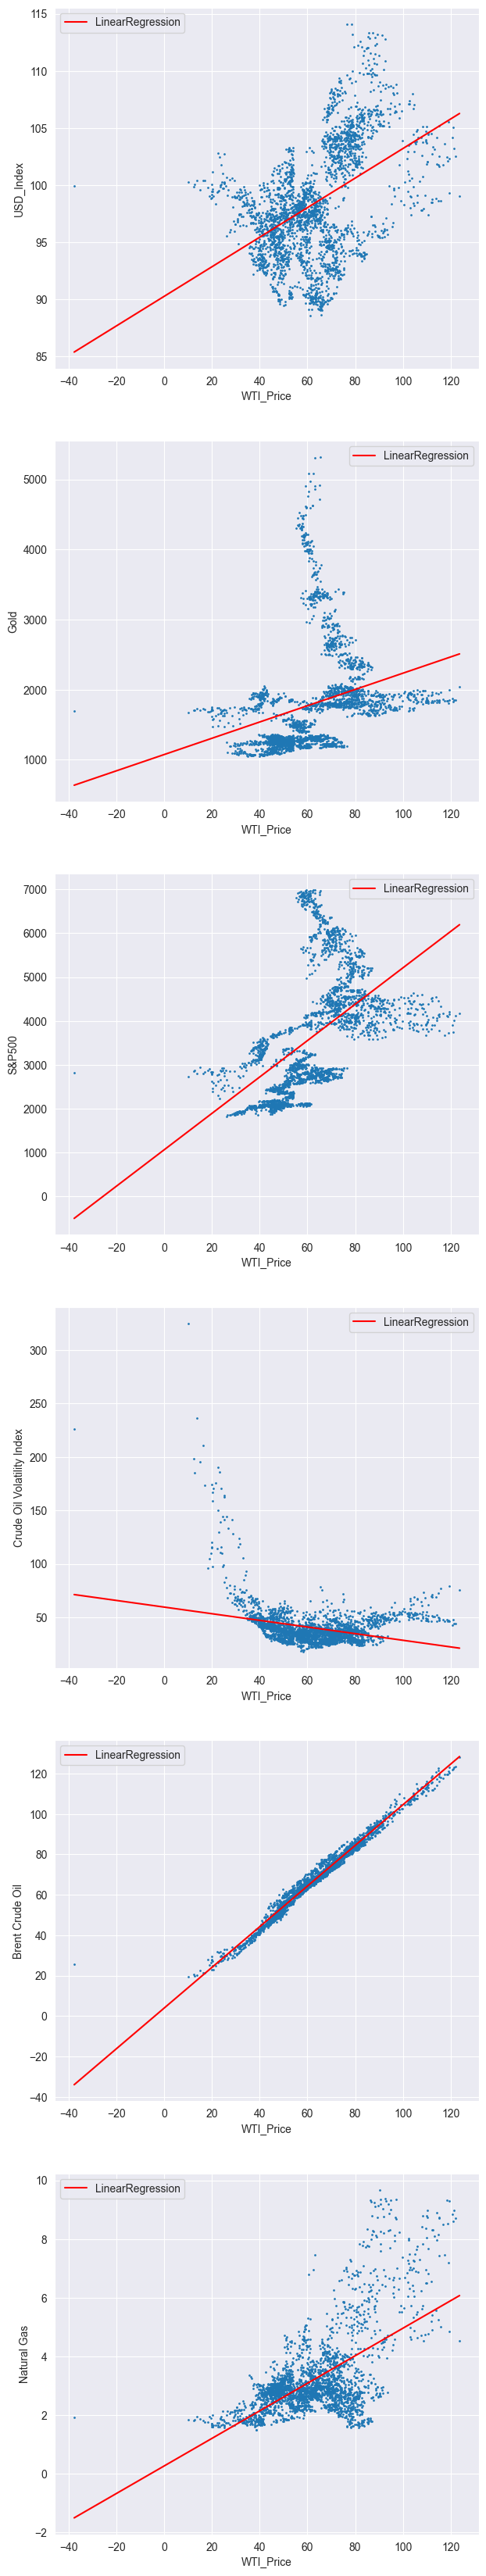

In [183]:
fig,axs = plt.subplots(len(YAHOO_TICKER)-1, 1, figsize = (7, (len(YAHOO_TICKER)-1)*7), squeeze = False)
axs = axs.flatten()
ax_idx = 0
for value in YAHOO_TICKER.values():
    if value == 'WTI_Price': continue
    plot_scatter(yh_data[['WTI_Price',value]], axs[ax_idx])
    ax_idx+=1

<Axes: xlabel='Ticker', ylabel='Ticker'>

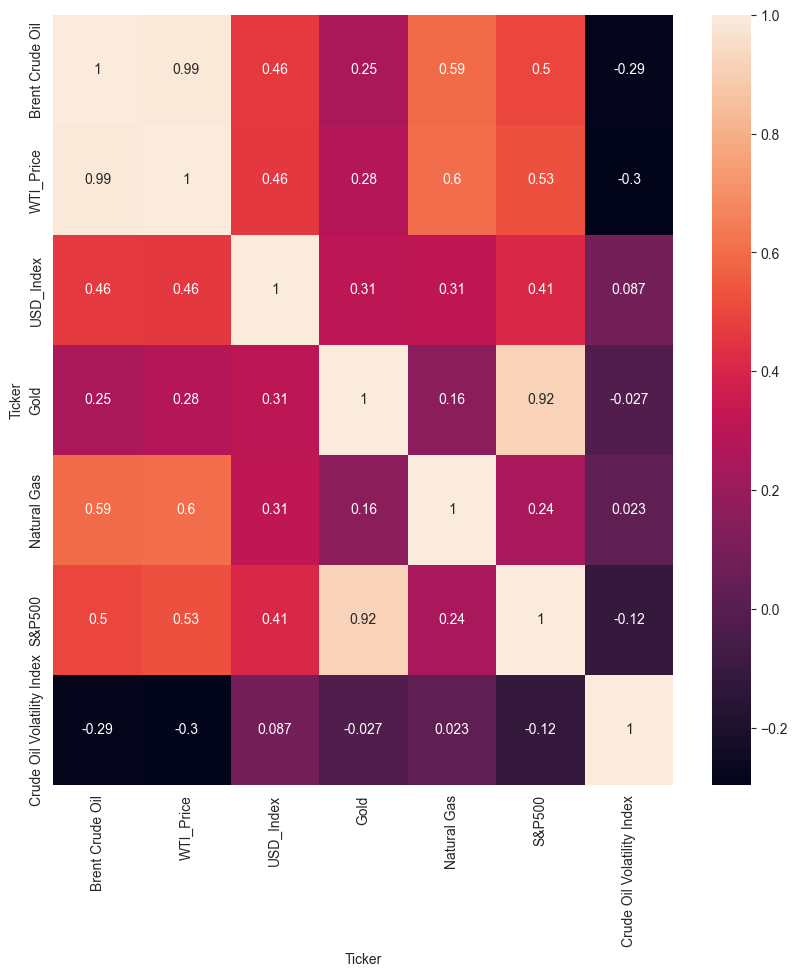

In [184]:
correlation = yh_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot=True, xticklabels = correlation.columns, yticklabels = correlation.columns)

In [185]:
# considering the correlation between gold and s&p500 is significant, maybe we can remove one of them.